# Key-Word Occurrences of an EN Wikipedia Page

## 1. Libraries and stop-words

In [3]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import networkx as nx

### Wikipedia specific stop-words
- commonly found on any Wikipedia page, especially in the 'References' section => therefore included in stop-list:

  - "retrieved", "archived", "remove", "edit", "original", "main", "article", "isbn"; 
  - "january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december".

In [4]:
# predefined list of stop-words
stop_words = ["'ll", "'tis", "'twas", "'ve", "10", "39", "a", "a's", "able", "ableabout", "about", "above", "abroad", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "adopted", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ago", "ah", "ahead", "ai", "ain't", "aint", "al", "all", "allow", "allows", "almost", "alone", "along", "alongside", "already", "also", "although", "always", "am", "amid", "amidst", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "aq", "ar", "are", "area", "areas", "aren", "aren't", "arent", "arise", "around", "arpa", "as", "aside", "ask", "asked", "asking", "asks", "associated", "at", "au", "auth", "available", "aw", "away", "awfully", "az", "b", "ba", "back", "backed", "backing", "backs", "backward", "backwards", "bb", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "began", "begin", "beginning", "beginnings", "begins", "behind", "being", "beings", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bf", "bg", "bh", "bi", "big", "bill", "billion", "biol", "bj", "bm", "bn", "bo", "both", "bottom", "br", "brief", "briefly", "bs", "bt", "but", "buy", "bv", "bw", "by", "bz", "c", "c'mon", "c's", "ca", "call", "came", "can", "can't", "cannot", "cant", "caption", "case", "cases", "cause", "causes", "cc", "cd", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "ck", "cl", "clear", "clearly", "click", "cm", "cmon", "cn", "co", "co.", "com", "come", "comes", "computer", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "copy", "corresponding", "could", "could've", "couldn", "couldn't", "couldnt", "course", "cr", "cry", "cs", "cu", "currently", "cv", "cx", "cy", "cz", "d", "dare", "daren't", "darent", "date", "de", "dear", "definitely", "describe", "described", "despite", "detail", "did", "didn", "didn't", "didnt", "differ", "different", "differently", "directly", "dj", "dk", "dm", "do", "does", "doesn", "doesn't", "doesnt", "doing", "don", "don't", "done", "dont", "doubtful", "down", "downed", "downing", "downs", "downwards", "due", "during", "dz", "e", "each", "early", "ec", "ed", "edu", "ee", "effect", "eg", "eh", "eight", "eighty", "either", "eleven", "else", "elsewhere", "empty", "end", "ended", "ending", "ends", "enough", "entirely", "er", "es", "especially", "et", "et-al", "etc", "even", "evenly", "ever", "evermore", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "f", "face", "faces", "fact", "facts", "fairly", "far", "farther", "felt", "few", "fewer", "ff", "fi", "fifteen", "fifth", "fifty", "fify", "fill", "find", "finds", "fire", "first", "five", "fix", "fj", "fk", "fm", "fo", "followed", "following", "follows", "for", "forever", "former", "formerly", "forth", "forty", "forward", "found", "four", "fr", "free", "from", "front", "full", "fully", "further", "furthered", "furthering", "furthermore", "furthers", "fx", "g", "ga", "gave", "gb", "gd", "ge", "general", "generally", "get", "gets", "getting", "gf", "gg", "gh", "gi", "give", "given", "gives", "giving", "gl", "gm", "gmt", "gn", "go", "goes", "going", "gone", "good", "goods", "got", "gotten", "gov", "gp", "gq", "gr", "great", "greater", "greatest", "greetings", "group", "grouped", "grouping", "groups", "gs", "gt", "gu", "gw", "gy", "h", "had", "hadn't", "hadnt", "half", "happens", "hardly", "has", "hasn", "hasn't", "hasnt", "have", "haven", "haven't", "havent", "having", "he", "he'd", "he'll", "he's", "hed", "hell", "hello", "help", "hence", "her", "here", "here's", "hereafter", "hereby", "herein", "heres", "hereupon", "hers", "herself", "herse”", "hes", "hi", "hid", "high", "higher", "highest", "him", "himself", "himse”", "his", "hither", "hk", "hm", "hn", "home", "homepage", "hopefully", "how", "how'd", "how'll", "how's", "howbeit", "however", "hr", "ht", "htm", "html", "http", "hu", "hundred", "i", "i'd", "i'll", "i'm", "i've", "i.e.", "id", "ie", "if", "ignored", "ii", "il", "ill", "im", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "inc.", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "inside", "insofar", "instead", "int", "interest", "interested", "interesting", "interests", "into", "invention", "inward", "io", "iq", "ir", "is", "isn", "isn't", "isnt", "it", "it'd", "it'll", "it's", "itd", "itll", "its", "itself", "itse”", "ive", "j", "je", "jm", "jo", "join", "jp", "just", "k", "ke", "keep", "keeps", "kept", "keys", "kg", "kh", "ki", "kind", "km", "kn", "knew", "know", "known", "knows", "kp", "kr", "kw", "ky", "kz", "l", "la", "large", "largely", "last", "lately", "later", "latest", "latter", "latterly", "lb", "lc", "least", "length", "less", "lest", "let", "let's", "lets", "li", "like", "liked", "likely", "likewise", "line", "little", "lk", "ll", "long", "longer", "longest", "look", "looking", "looks", "low", "lower", "lr", "ls", "lt", "ltd", "lu", "lv", "ly", "m", "ma", "made", "mainly", "make", "makes", "making", "man", "many", "may", "maybe", "mayn't", "maynt", "mc", "md", "me", "mean", "means", "meantime", "meanwhile", "member", "members", "men", "merely", "mg", "mh", "microsoft", "might", "might've", "mightn't", "mightnt", "mil", "mill", "million", "mine", "minus", "miss", "mk", "ml", "mm", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mp", "mq", "mr", "mrs", "ms", "msie", "mt", "mu", "much", "mug", "must", "must've", "mustn't", "mustnt", "mv", "mw", "mx", "my", "myself", "myse”", "mz", "n", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needed", "needing", "needn't", "neednt", "needs", "neither", "net", "netscape", "never", "neverf", "neverless", "nevertheless", "new", "newer", "newest", "next", "nf", "ng", "ni", "nine", "ninety", "nl", "no", "no-one", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "notwithstanding", "novel", "now", "nowhere", "np", "nr", "nu", "null", "number", "numbers", "nz", "o", "obtain", "obtained", "obviously", "of", "off", "often", "oh", "ok", "okay", "old", "older", "oldest", "om", "omitted", "on", "once", "one", "one's", "ones", "only", "onto", "open", "opened", "opening", "opens", "opposite", "or", "ord", "order", "ordered", "ordering", "orders", "org", "other", "others", "otherwise", "ought", "oughtn't", "oughtnt", "our", "ours", "ourselves", "out", "outside", "over", "overall", "owing", "own", "p", "pa", "page", "pages", "part", "parted", "particular", "particularly", "parting", "parts", "past", "pe", "per", "perhaps", "pf", "pg", "ph", "pk", "pl", "place", "placed", "places", "please", "plus", "pm", "pmid", "pn", "point", "pointed", "pointing", "points", "poorly", "possible", "possibly", "potentially", "pp", "pr", "predominantly", "present", "presented", "presenting", "presents", "presumably", "previously", "primarily", "probably", "problem", "problems", "promptly", "proud", "provided", "provides", "pt", "put", "puts", "pw", "py", "q", "qa", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "reserved", "respectively", "resulted", "resulting", "results", "right", "ring", "ro", "room", "rooms", "round", "ru", "run", "rw", "s", "sa", "said", "same", "saw", "say", "saying", "says", "sb", "sc", "sd", "se", "sec", "second", "secondly", "seconds", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "sees", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "seventy", "several", "sg", "sh", "shall", "shan't", "shant", "'s", "'d", "'ll", "'ve", "'re", "she", "she'd", "she'll", "she's", "shed", "shell", "shes", "should", "should've", "shouldn", "shouldn't", "shouldnt", "show", "showed", "showing", "shown", "showns", "shows", "si", "side", "sides", "significant", "significantly", "similar", "similarly", "since", "sincere", "site", "six", "sixty", "sj", "sk", "sl", "slightly", "sm", "small", "smaller", "smallest", "sn", "so", "some", "somebody", "someday", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "sr", "st", "state", "states", "still", "stop", "strongly", "su", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sv", "sy", "system", "sz", "t", "t's", "take", "taken", "taking", "tc", "td", "tell", "ten", "tends", "test", "text", "tf", "tg", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "that's", "that've", "thatll", "thats", "thatve", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "there'd", "there'll", "there're", "there's", "there've", "thereafter", "thereby", "thered", "therefore", "therein", "therell", "thereof", "therere", "theres", "thereto", "thereupon", "thereve", "these", "they", "they'd", "they'll", "they're", "they've", "theyd", "theyll", "theyre", "theyve", "thick", "thin", "thing", "things", "think", "thinks", "third", "thirty", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thought", "thoughts", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "til", "till", "tip", "tis", "tj", "tk", "tm", "tn", "to", "today", "together", "too", "took", "top", "toward", "towards", "tp", "tr", "tried", "tries", "trillion", "truly", "try", "trying", "ts", "tt", "turn", "turned", "turning", "turns", "tv", "tw", "twas", "twelve", "twenty", "twice", "two", "tz", "u", "ua", "ug", "uk", "um", "un", "under", "underneath", "undoing", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "up", "upon", "ups", "upwards", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "uucp", "uy", "uz", "v", "va", "value", "various", "vc", "ve", "versus", "very", "vg", "vi", "via", "viz", "vn", "vol", "vols", "vs", "vu", "w", "want", "wanted", "wanting", "wants", "was", "wasn", "wasn't", "wasnt", "way", "ways", "we", "we'd", "we'll", "we're", "we've", "web", "webpage", "website", "wed", "welcome", "well", "wells", "went", "were", "weren", "weren't", "werent", "weve", "wf", "what", "what'd", "what'll", "what's", "what've", "whatever", "whatll", "whats", "whatve", "when", "when'd", "when'll", "when's", "whence", "whenever", "where", "where'd", "where'll", "where's", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "which", "whichever", "while", "whilst", "whim", "whither", "who", "who'd", "who'll", "who's", "whod", "whoever", "whole", "wholl", "whom", "whomever", "whos", "whose", "why", "why'd", "why'll", "why's", "widely", "width", "will", "willing", "wish", "with", "within", "without", "won", "won't", "wonder", "wont", "words", "work", "worked", "working", "works", "world", "would", "would've", "wouldn", "'ve", "'d", "'t", "wouldn't", "wouldnt", "https", "http", "n't", "ws", "www", "x", "y", "ye", "year", "years", "yes", "yet", "you", "you'd", "you'll", "you're", "you've", "youd", "youll", "young", "younger", "youngest", "your", "youre", "yours", "yourself", "yourselves", "youve", "yt", "yu", "z", "za", "zero", "zm", "zr", "``", "`", "```", ";", ",", ".", ":", "/", "-", "–", "\"", "'", "?", "!", "(", ")", "''", "'m", "retrieved", "archived", "original", "january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december", "edit", "main", "article", "isbn", "remove"]

## 2. Extracting words and word-pairs

In [5]:
# choose an url by removing # or type your own

url = 'https://en.wikipedia.org/wiki/Berlin'
# url = 'https://en.wikipedia.org/wiki/Houseplant'
# url = 'https://en.wikipedia.org/wiki/Minimalism'
# url = 'https://en.wikipedia.org/wiki/Ludwig_Mies_van_der_Rohe'
# url = YOUR URL

# *the final description is based on Berlin's Wikipedia page, but the rest works for multiple.

In [6]:
# fetch Wikipedia page and extract text
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
text = soup.find(id='mw-content-text').get_text()

In [7]:
# tokenize sentences and words
sentences = sent_tokenize(text)
words = word_tokenize(text.lower())

# remove stop-words and non-alphabetic characters
words = [word for word in words if word.isalpha() and word not in stop_words]

# calculate word occurrences
word_count = collections.Counter(words)

# check that they look as expected
word_count

Counter({'capital': 47,
         'largest': 42,
         'city': 175,
         'germany': 111,
         'berlin': 656,
         'disambiguation': 1,
         'germanyberlincapital': 1,
         'municipalitytiergarten': 1,
         'mitte': 17,
         'skylinebrandenburg': 1,
         'gatereichstagcharlottenburg': 1,
         'palacemuseum': 1,
         'islandvictory': 1,
         'columnpotsdam': 1,
         'squareberlin': 1,
         'tower': 6,
         'cathedral': 13,
         'palace': 17,
         'flagcoat': 1,
         'armsshow': 1,
         'berlinshow': 1,
         'germanyshow': 1,
         'europecoordinates': 1,
         'bodyabgeordnetenhaus': 1,
         'governing': 8,
         'mayorfranziska': 1,
         'giffey': 2,
         'spd': 2,
         'bundesrat': 3,
         'bundestag': 6,
         'sq': 8,
         'mi': 24,
         'ft': 14,
         'population': 28,
         'urban': 21,
         'metro': 5,
         'demonymsberliner': 1,
         'english': 

In [8]:
# calculate word-pair occurrences
word_pairs = []

for sentence in sentences:
    sentence_words = word_tokenize(sentence.lower())
    sentence_words = [word for word in sentence_words if word.isalpha() and word not in stop_words]
    for i in range(len(sentence_words) - 1):
        word_pairs.append((sentence_words[i], sentence_words[i + 1]))

word_pair_count = collections.Counter(word_pairs)

# check that they look as expected
word_pair_count

Counter({('capital', 'largest'): 2,
         ('largest', 'city'): 2,
         ('city', 'germany'): 4,
         ('germany', 'berlin'): 7,
         ('berlin', 'disambiguation'): 1,
         ('germanyberlincapital', 'city'): 1,
         ('city', 'municipalitytiergarten'): 1,
         ('municipalitytiergarten', 'mitte'): 1,
         ('mitte', 'skylinebrandenburg'): 1,
         ('skylinebrandenburg', 'gatereichstagcharlottenburg'): 1,
         ('gatereichstagcharlottenburg', 'palacemuseum'): 1,
         ('palacemuseum', 'islandvictory'): 1,
         ('islandvictory', 'columnpotsdam'): 1,
         ('columnpotsdam', 'squareberlin'): 1,
         ('squareberlin', 'tower'): 1,
         ('tower', 'berlin'): 1,
         ('berlin', 'cathedral'): 7,
         ('cathedral', 'berlin'): 3,
         ('berlin', 'palace'): 4,
         ('palace', 'flagcoat'): 1,
         ('flagcoat', 'armsshow'): 1,
         ('armsshow', 'berlinshow'): 1,
         ('berlinshow', 'germanyshow'): 1,
         ('germanyshow', '

## 3. Visualizations 

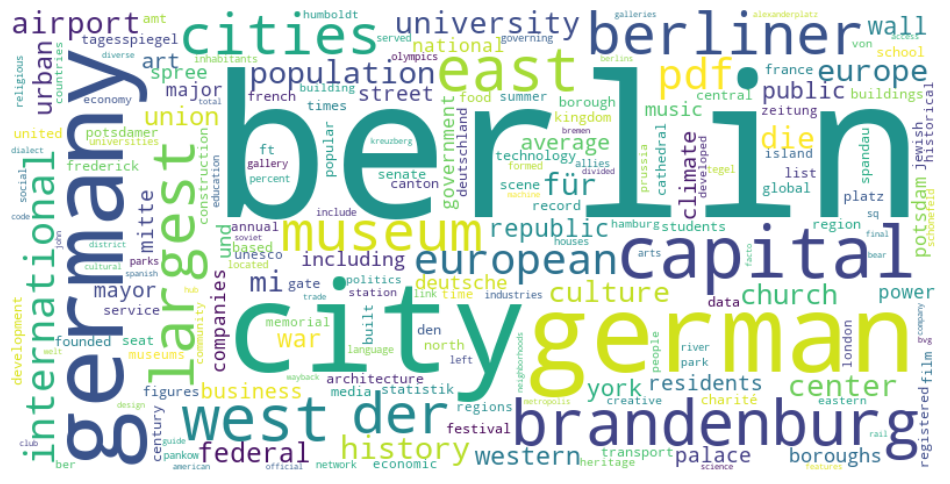

In [9]:
# WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

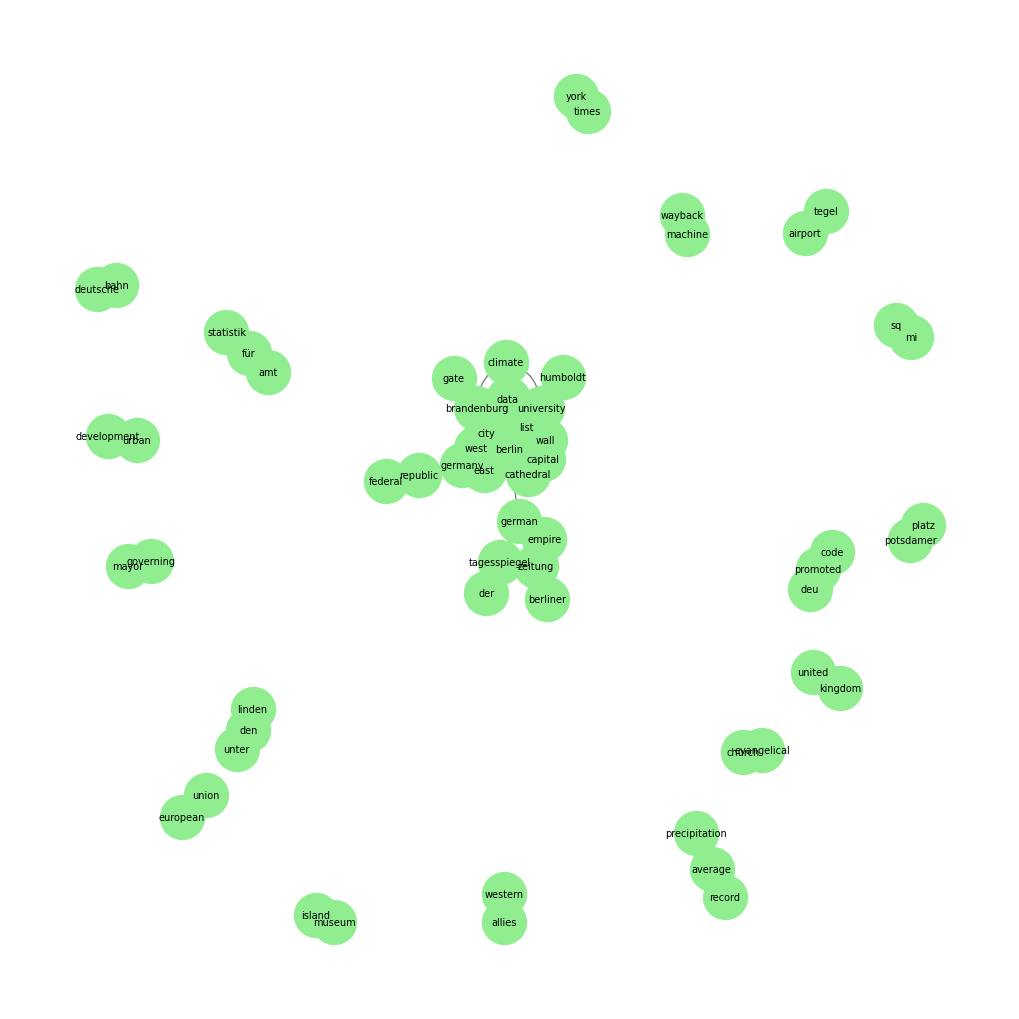

In [10]:
# Network Graph

# top 50 word pairs based on occurrences
top_word_pairs = word_pair_count.most_common(50)

# extract word pairs without occurrences
word_pairs = [pair for pair, _ in top_word_pairs]

G = nx.Graph()
G.add_edges_from(word_pairs)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=7, font_weight='light', node_color='lightgreen', node_size=1000, edge_color='gray')
plt.show()


In [11]:
# top 10 most common words and word-pairs respectively
top_10_words = [word for word, _ in word_count.most_common(10)]
top_10_word_counts = [count for _, count in word_count.most_common(10)]
top_10_word_pairs = [f'{word1} {word2}' for (word1, word2), _ in word_pair_count.most_common(10)]
top_10_word_pair_counts = [count for _, count in word_pair_count.most_common(10)]

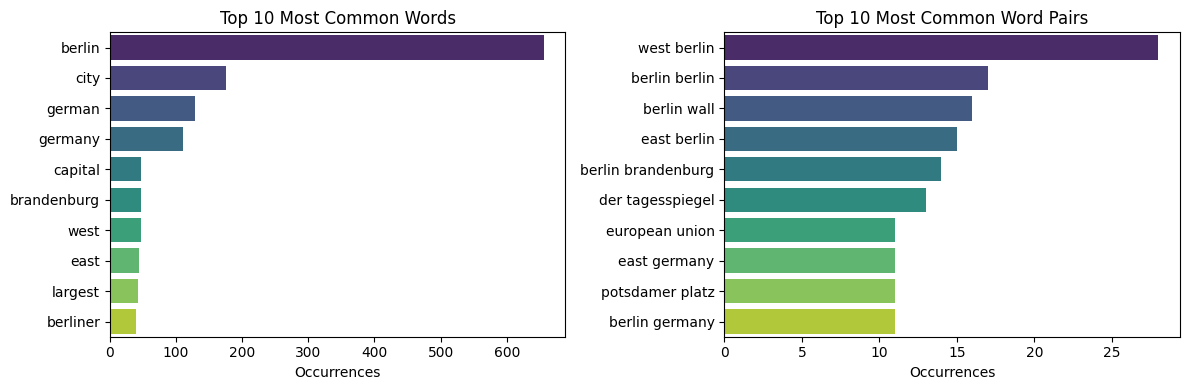

In [12]:
# Bar Plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.barplot(x=top_10_word_counts, y=top_10_words, palette='viridis')
plt.xlabel('Occurrences')
plt.title('Top 10 Most Common Words')

plt.subplot(1, 2, 2)
sns.barplot(x=top_10_word_pair_counts, y=top_10_word_pairs, palette='viridis')
plt.xlabel('Occurrences')
plt.title('Top 10 Most Common Word Pairs')

plt.tight_layout()
plt.show()

## 4. From top words to description

- simple description of chosen Wikipedia page based on the above calculations

Berlin, the capital and largest German city, is the main focus of this page, with over 600 mentions. The page discusses historical aspects of the city, such as its division, as evidenced by the frequently mentioned terms 'West Berlin', 'East Berlin', and the 'Berlin Wall'. 

It also covers the relationship between Berlin and the surrounding region of Brandenburg, as well as landmarks like Potsdamer Platz and the city's relevance in the context of the European Union.

_

### 🦊🌳🏠🌲🌆 **BLN**